# Extra Repository Analyses

This notebooks has extra analyses related to repositories. These analyses did not make into the paper.

In [1]:
import sys
sys.path.insert(0, '../archaeology')

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import NullLocator
from matplotlib_venn import venn3, venn2


from consts import R_STATUSES
from db import connect
import analysis_helpers, importlib
importlib.reload(analysis_helpers)
from analysis_helpers import distribution_with_boxplot, fig, describe_processed
%matplotlib inline

In [2]:
with connect() as session:
    repositories = pd.read_sql_table('repositories', session.connection())

## Notebooks count

Distribution(min=0, q1=1.0, median=2.0, q3=5.0, max=10869)


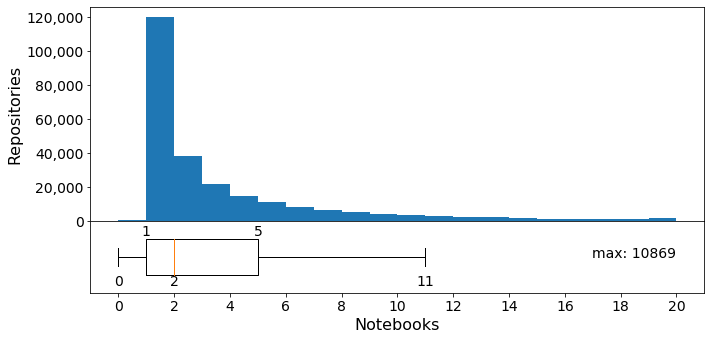

In [3]:
column = repositories["notebooks_count"]
with fig("e1_t_notebooks_count", 9, 5):
    distribution = distribution_with_boxplot(column, 0, 20, 2, "Repositories", "Notebooks",  True)
    print(distribution)

## Repositories with requirements.txt or setup.py

In [4]:
fn = lambda x: len(x)

setup_and_requirements_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_requirements = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements_and_pipfile = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
pipfiles = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
others = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])

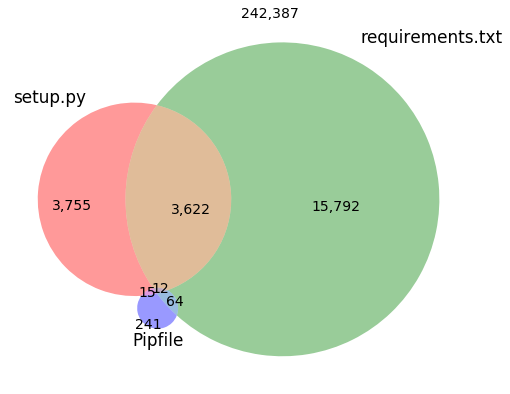

In [5]:
with fig("e1_t_repository_dependencies_x3", 8, 6):
    gcf = plt.figure()
    ax = gcf.add_subplot(111)
    venn = venn3(subsets={
        "111": setup_and_requirements_and_pipfile,
        "110": setup_and_requirements,
        "101": setup_and_pipfile,
        "100": setup,
        "011": requirements_and_pipfile,
        "010": requirements,
        "001": pipfiles
    }, set_labels=('setup.py', 'requirements.txt', 'Pipfile'), ax=ax)
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    ax.text(0, 0.6, "{0:,g}".format(others))
    plt.tight_layout()
    plt.plot();
    

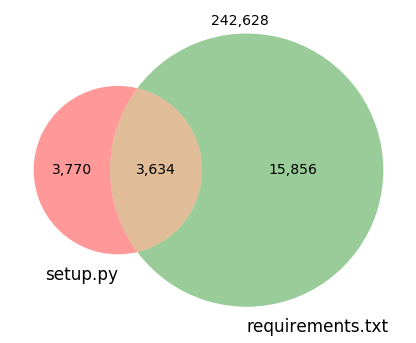

In [6]:
with fig("e1_t_repository_dependencies_x2", 8, 6):
    gcf = plt.figure()
    ax = gcf.add_subplot(111)
    venn = venn2(subsets={
        "11": setup_and_requirements + setup_and_requirements_and_pipfile,
        "10": setup + setup_and_pipfile,
        "01": requirements + requirements_and_pipfile,
    }, set_labels=('setup.py', 'requirements.txt'), ax=ax)
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    ax.text(0, 0.55, "{0:,g}".format(others + pipfiles))
    ax.set_axis_off()
    #plt.subplots_adjust(top = 0.9, bottom = 0, right = 1, left = 0, 
    #        hspace = 0, wspace = 0)
    ax.margins(0,0)
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    plt.plot();


In [7]:
pipfile_total = setup_and_requirements_and_pipfile + setup_and_pipfile + requirements_and_pipfile + pipfiles
dependencies = (
    setup_and_requirements_and_pipfile
    + setup_and_requirements
    + setup_and_pipfile
    + setup
    + requirements_and_pipfile
    + requirements
    + pipfiles
)

print("Repositories with Pipfile: {:,}  ({:.2%})".format(pipfile_total, pipfile_total / len(repositories)))
print("Repositories with Declared Modules: {:,} ({:.2%})".format(dependencies, dependencies / (dependencies + others)))

Repositories with Pipfile: 332  (0.12%)
Repositories with Declared Modules: 23,501 (8.84%)


## Notebooks in repositories with requirements.py or setup.py or Pipfile

In [8]:
fn = lambda x: x["notebooks_count"].sum()

setup_and_requirements_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_requirements = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements_and_pipfile = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
pipfiles = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
others = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])


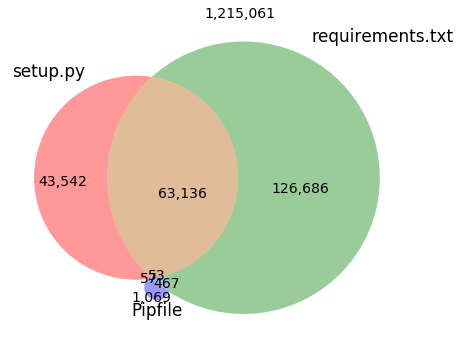

In [9]:
with fig("e1_t_notebook_dependencies_x3", 8, 6):
    gcf = plt.figure()
    ax = gcf.add_subplot(111)
    venn = venn3(subsets={
        "111": setup_and_requirements_and_pipfile,
        "110": setup_and_requirements,
        "101": setup_and_pipfile,
        "100": setup,
        "011": requirements_and_pipfile,
        "010": requirements,
        "001": pipfiles
    }, set_labels=('setup.py', 'requirements.txt', 'Pipfile'), ax=ax)
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    ax.text(0, 0.6, "{0:,}".format(others))
    plt.plot()

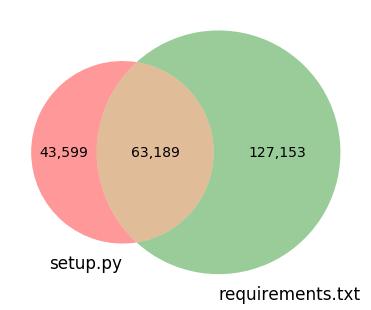

In [10]:
with fig("e1_t_notebook_dependencies_x2", 8, 6):
    gcf = plt.figure()
    ax = gcf.add_subplot(111)
    venn = venn2(subsets={
        "11": setup_and_requirements + setup_and_requirements_and_pipfile,
        "10": setup + setup_and_pipfile,
        "01": requirements + requirements_and_pipfile,
    }, set_labels=('setup.py', 'requirements.txt'), ax=ax)
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    #ax.text(0, 0.6, "{0:,}".format(others + pipfiles))
    plt.subplots_adjust(top=0.8, right=0.8)
    plt.plot();



In [11]:
total_notebooks = repositories["notebooks_count"].sum()
pipfile_total = setup_and_requirements_and_pipfile + setup_and_pipfile + requirements_and_pipfile + pipfiles
dependencies = (
    setup_and_requirements_and_pipfile
    + setup_and_requirements
    + setup_and_pipfile
    + setup
    + requirements_and_pipfile
    + requirements
    + pipfiles
)

print("Notebooks in repositories with Pipfile: {:,} ({:.2%})".format(pipfile_total, pipfile_total/total_notebooks))
print("Notebooks in repositories with Declared Modules: {:,} ({:.2%})".format(dependencies, dependencies/(dependencies + others)))    


Notebooks in repositories with Pipfile: 1,646 (0.11%)
Notebooks in repositories with Declared Modules: 235,010 (16.21%)


# Status

In [12]:
series = repositories.groupby("processed").size()
#series
#series.plot(kind="bar")

,0
notebooks and cells - ok,265888
compress - ok,265888
requirements - ok,265888
extracted files,265888
update - ok,236934
unavailable files,17620
commit mismatch,780
update - not found,28954


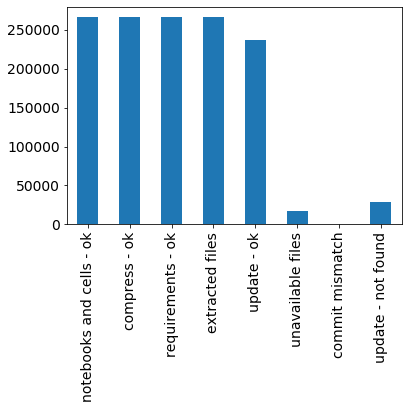

In [13]:
described = describe_processed(series, R_STATUSES, True)
display(described.to_frame())
described.plot(kind="bar")

# Part 2 - Filtering by valid python notebooks

## Query

Select asts and modules from:

- existing

  ```n.skip & 2048 = 0```

- valid
  
  ```NOT (n.kernel = 'no-kernel' AND n.nbformat = '0')
  AND n.processed & 15 = 0 AND n.skip & (1024 + 512) = 0```


- non-duplicated
  
  ```n.skip & (1024 + 512 + 128) = 0```
  
- Python notebooks

  ```n.language = 'python' AND LEFT(n.language_version, 1) IN ('2', '3')```
  
- with valid syntax

  ```n.processed & 16 = 0```
  

In [14]:
%%time
with connect() as session:
    print("Query notebooks")
    rep_ids = pd.read_sql("""
        SELECT distinct n.repository_id
        FROM notebooks n
        WHERE NOT (n.kernel = 'no-kernel' AND n.nbformat = '0')
        AND n.processed & 15 = 0
        AND n.skip & 2048 = 0
        AND n.skip & (1024 + 512) = 0
        AND n.skip & (1024 + 512 + 128) = 0
        AND n.language = 'python'
        AND n.processed & 16 = 0
        AND LEFT(n.language_version, 1) IN ('2', '3')
    """, session.connection())
    

Query notebooks
CPU times: user 587 ms, sys: 12.5 ms, total: 599 ms
Wall time: 946 ms


In [15]:
repositories = repositories.set_index("id").join(rep_ids.set_index("repository_id"), how="inner").reset_index().rename(columns={'index':'id'})

Distribution(min=1, q1=1.0, median=2.0, q3=5.0, max=10869)


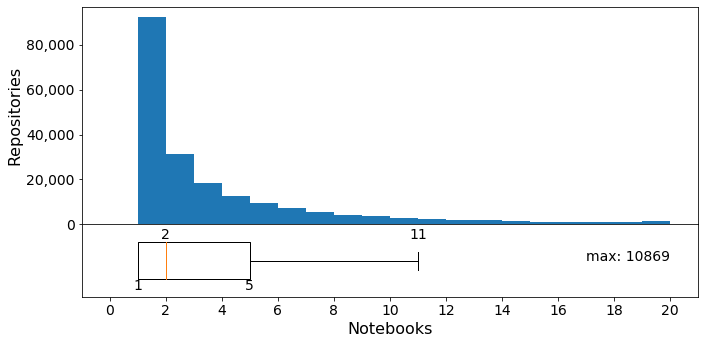

In [16]:
column = repositories["notebooks_count"]
with fig("e1_d_notebooks_count", 9, 5):
    distribution = distribution_with_boxplot(column, 0, 20, 2, "Repositories", "Notebooks",  True)
    print(distribution)

## Repositories with requirements.txt or setup.py

In [17]:
fn = lambda x: len(x)

setup_and_requirements_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_requirements = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements_and_pipfile = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
pipfiles = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
others = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])

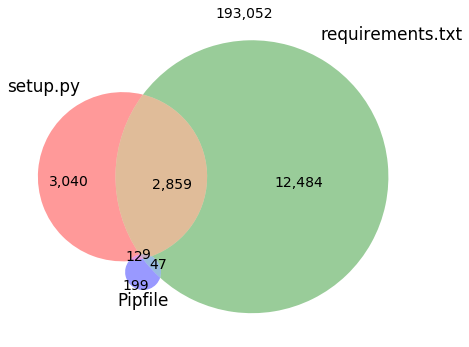

In [18]:
with fig("e1_d_notebook_dependencies_x3", 8, 6):
    gcf = plt.figure()
    ax = gcf.add_subplot(111)
    venn = venn3(subsets={
        "111": setup_and_requirements_and_pipfile,
        "110": setup_and_requirements,
        "101": setup_and_pipfile,
        "100": setup,
        "011": requirements_and_pipfile,
        "010": requirements,
        "001": pipfiles
    }, set_labels=('setup.py', 'requirements.txt', 'Pipfile'), ax=ax)
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    ax.text(0, 0.6, "{0:,}".format(others))
    plt.plot()

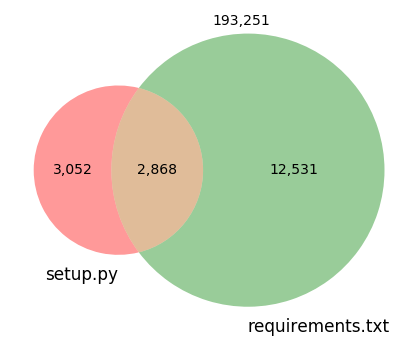

In [19]:
with fig("e1_d_repository_dependencies_x2", 8, 6):
    gcf = plt.figure()
    ax = gcf.add_subplot(111)
    venn = venn2(subsets={
        "11": setup_and_requirements + setup_and_requirements_and_pipfile,
        "10": setup + setup_and_pipfile,
        "01": requirements + requirements_and_pipfile,
    }, set_labels=('setup.py', 'requirements.txt'), ax=ax)
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    ax.text(0, 0.55, "{0:,g}".format(others + pipfiles))
    ax.set_axis_off()
    #plt.subplots_adjust(top = 0.9, bottom = 0, right = 1, left = 0, 
    #        hspace = 0, wspace = 0)
    ax.margins(0,0)
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    plt.plot();


In [20]:
pipfile_total = setup_and_requirements_and_pipfile + setup_and_pipfile + requirements_and_pipfile + pipfiles
dependencies = (
    setup_and_requirements_and_pipfile
    + setup_and_requirements
    + setup_and_pipfile
    + setup
    + requirements_and_pipfile
    + requirements
    + pipfiles
)

print("Repositories with Pipfile: {:,}  ({:.2%})".format(pipfile_total, pipfile_total / len(repositories)))
print("Repositories with Declared Modules: {:,} ({:.2%})".format(dependencies, dependencies / (dependencies + others)))

Repositories with Pipfile: 267  (0.13%)
Repositories with Declared Modules: 18,650 (8.81%)


## Notebooks in repositories with requirements.py or setup.py or Pipfile

In [21]:
fn = lambda x: x["notebooks_count"].sum()

setup_and_requirements_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_requirements = fn(repositories[
    (repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup_and_pipfile = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements_and_pipfile = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
setup = fn(repositories[
    (repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
requirements = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    (repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
pipfiles = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])
others = fn(repositories[
    ~(repositories["setups_count"] > 0) &
    ~(repositories["requirements_count"] > 0) &
    ~((repositories["pipfiles_count"] > 0) |
     (repositories["pipfile_locks_count"] > 0))
])


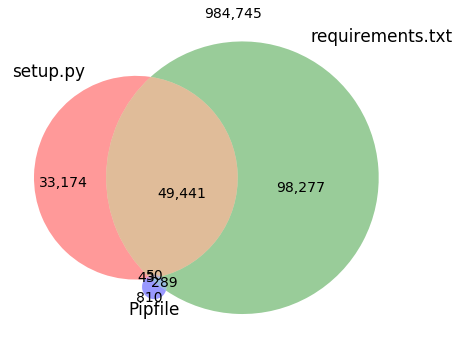

In [22]:
with fig("e1_d_notebook_dependencies_x3", 8, 6):
    gcf = plt.figure()
    ax = gcf.add_subplot(111)
    venn = venn3(subsets={
        "111": setup_and_requirements_and_pipfile,
        "110": setup_and_requirements,
        "101": setup_and_pipfile,
        "100": setup,
        "011": requirements_and_pipfile,
        "010": requirements,
        "001": pipfiles
    }, set_labels=('setup.py', 'requirements.txt', 'Pipfile'), ax=ax)
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    ax.text(0, 0.6, "{0:,}".format(others))
    plt.plot()

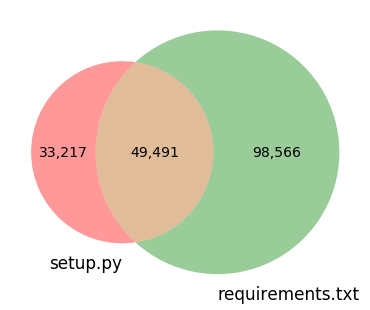

In [23]:
with fig("e1_d_notebook_dependencies_x2", 8, 6):
    gcf = plt.figure()
    ax = gcf.add_subplot(111)
    venn = venn2(subsets={
        "11": setup_and_requirements + setup_and_requirements_and_pipfile,
        "10": setup + setup_and_pipfile,
        "01": requirements + requirements_and_pipfile,
    }, set_labels=('setup.py', 'requirements.txt'), ax=ax)
    for label in venn.subset_labels:
        label.set_text("{0:,g}".format(int(label.get_text())))
    #ax.text(0, 0.6, "{0:,}".format(others + pipfiles))
    plt.subplots_adjust(top=0.8, right=0.8)
    plt.plot();



In [24]:
total_notebooks = repositories["notebooks_count"].sum()
pipfile_total = setup_and_requirements_and_pipfile + setup_and_pipfile + requirements_and_pipfile + pipfiles
dependencies = (
    setup_and_requirements_and_pipfile
    + setup_and_requirements
    + setup_and_pipfile
    + setup
    + requirements_and_pipfile
    + requirements
    + pipfiles
)

print("Notebooks in repositories with Pipfile: {:,} ({:.2%})".format(pipfile_total, pipfile_total/total_notebooks))
print("Notebooks in repositories with Declared Modules: {:,} ({:.2%})".format(dependencies, dependencies/(dependencies + others)))    


Notebooks in repositories with Pipfile: 1,192 (0.10%)
Notebooks in repositories with Declared Modules: 182,084 (15.61%)


This notebooks analyzes both all reposititories and repositoies with valid python notebooks